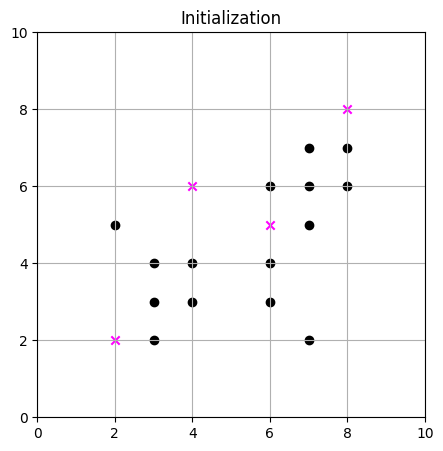

15個點，4組群分


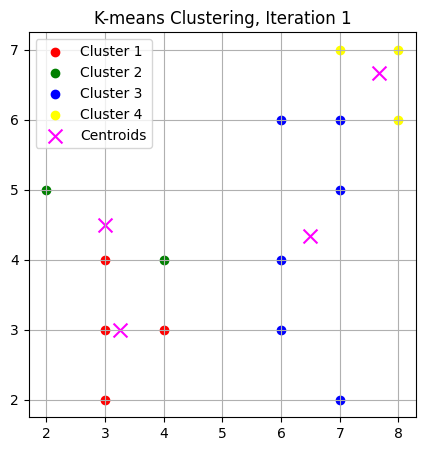

red:(3.25, 3.0) green:(3.0, 4.5) blue:(6.5, 4.33) yellow:(7.67, 6.67) 

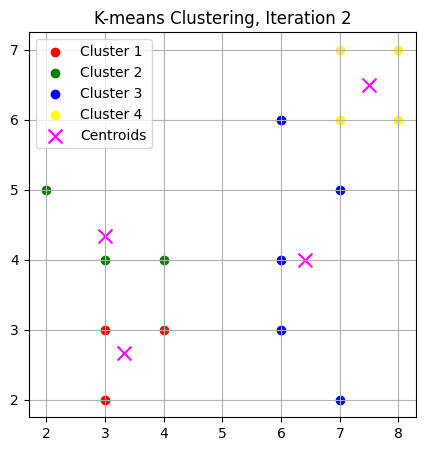

red:(3.33, 2.67) green:(3.0, 4.33) blue:(6.4, 4.0) yellow:(7.5, 6.5) 

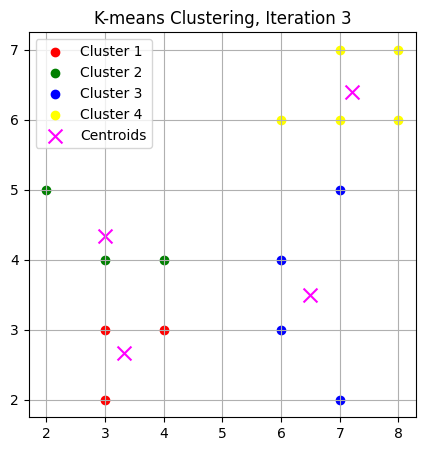

red:(3.33, 2.67) green:(3.0, 4.33) blue:(6.5, 3.5) yellow:(7.2, 6.4) 

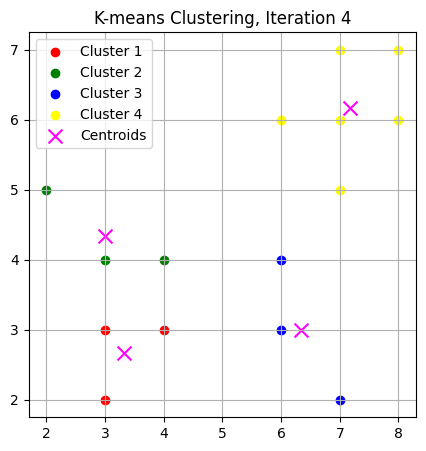

red:(3.33, 2.67) green:(3.0, 4.33) blue:(6.33, 3.0) yellow:(7.17, 6.17) 

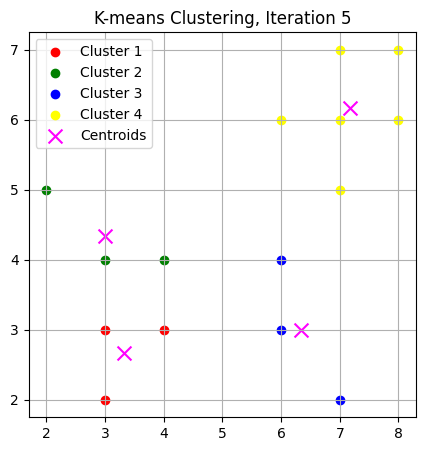

red:(3.33, 2.67) green:(3.0, 4.33) blue:(6.33, 3.0) yellow:(7.17, 6.17) 

分群完成，共執行了 5 次跌代。


In [1]:
import matplotlib.pyplot as plt

# 初始資料點
x = [2, 3, 3, 3, 4, 4, 6, 6, 6, 7, 7, 7, 7, 8, 8]
y = [5, 2, 3, 4, 3, 4, 3, 4, 6, 2, 5, 6, 7, 6, 7]

# 初始重心
kx = [2, 4, 6, 8]
ky = [2, 6, 5, 8]

# 設置圖片大小並繪製初始點
plt.figure(figsize=(5, 5))
plt.scatter(x, y, color='black')
plt.scatter(kx, ky, color='magenta', marker='x')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid(True)
plt.title('Initialization')
plt.show()
print(f'{len(x)}個點，{len(kx)}組群分')

# 兩點之間的距離
def dis(x1, y1, x2, y2):
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

# 將每筆元素群分
def cluster(x, y, kx, ky):
    team = [[] for _ in range(4)]
    for i in range(len(x)):
        distances = [dis(x[i], y[i], kx[j], ky[j]) for j in range(len(kx))]
        min_distance_index = distances.index(min(distances))
        team[min_distance_index].append((x[i], y[i]))
    return team

# 對群分完的元素找出新的群集中心
def re_seed(team):
    new_seeds = []
    for nodes in team:
        if nodes:
            sumx = sum(node[0] for node in nodes)
            sumy = sum(node[1] for node in nodes)
            new_seeds.append((sumx / len(nodes), sumy / len(nodes)))
        else:
            # 如果某個群組沒有點，則保持原位
            new_seeds.append((0, 0))  
    return [seed[0] for seed in new_seeds], [seed[1] for seed in new_seeds]

# 繪製分群結果的函數
def plot_clusters(team, kx, ky, iteration):
    plt.figure(figsize=(5, 5))
    colors = ['red', 'green', 'blue', 'yellow']
    for index, nodes in enumerate(team):
        px = [node[0] for node in nodes]
        py = [node[1] for node in nodes]
        plt.scatter(px, py, color=colors[index], label=f'Cluster {index+1}')
    plt.scatter(kx, ky, color='magenta', marker='x', s=100, label='Centroids')
    plt.title(f'K-means Clustering, Iteration {iteration}')
    plt.legend()
    plt.grid(True)
    plt.show()
    for i in range(4):
        print(f'{colors[i]}:({kx[i]:.3}, {ky[i]:.3})',end = ' ')
    

# k-means 群分函数
def kmeans(x, y, kx, ky):
    iteration = 1
    while True:
        team = cluster(x, y, kx, ky)
        nkx, nky = re_seed(team)
        plot_clusters(team, nkx, nky, iteration)
        if nkx == kx and nky == ky:
            print(f'\n\n分群完成，共執行了 {iteration} 次跌代。')
            break
        else:
            kx, ky = nkx, nky
            iteration += 1

# 呼叫 k-means 函數開始群分
kmeans(x, y, kx, ky)